<a href="https://colab.research.google.com/github/Specialgirl20/DATA-ANALYSIS-PROJECT/blob/main/GABRIEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ABOUT THIS DATASET**

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.And this project could help those nigerians who wants to travel outside the country and save them from applying for fraudulent jobs to avoid been duped

# **OBJECTIVE**

The dataset is very valuable as it can be used to answer the following questions:
1.	Create a classification model that uses text data features and meta-features and predict which job description are fraudulent or real.
2.	Identify key traits/features (words, entities, phrases) of job descriptions which are fraudulent in nature.
3.	Run a contextual embedding model to identify the most similar job descriptions.
4.	Perform Exploratory Data Analysis on the dataset to identify interesting insights from this dataset.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv.zip to fake_job_postings.csv.zip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
data = pd.read_csv('fake_job_postings.csv.zip')

In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
data.shape

(774, 18)

In [ ]:
data['title']

6                                    Head of Content (m/f)
15                              VP of Sales - Vault Dragon
23       Vice President, Sales and Sponsorship (Busines...
98                                         IC&E Technician
102                                Marketing Administrator
                               ...                        
17734                      Customer Service Representative
17759                      Customer Service Representative
17813                      Customer Service Representative
17849                               Communication Designer
17865    Portfolio Development Associate - Paris & rest...
Name: title, Length: 774, dtype: object

In [ ]:
data['location']

6               DE, BE, Berlin
15           SG, 01, Singapore
23            US, CA, Carlsbad
98           US, , Stocton, CA
102          GB, WAR, Coventry
                 ...          
17734          US, TX, Houston
17759         US, NY, New York
17813     US, PA, Philadelphia
17849    US, CA, San Francisco
17865          GB, LND, London
Name: location, Length: 774, dtype: object

In [ ]:
data.department.value_counts()

department
Sales                99
Engineering          58
Marketing            44
Oil and Gas          32
Customer Service     26
                     ..
Contact Centre        1
Dev & Software QA     1
Retail                1
Financial Dept        1
TRS-Clinical          1
Name: count, Length: 243, dtype: int64

In [ ]:
data.required_experience.value_counts()

required_experience
Mid-Senior level    241
Associate           199
Entry level         191
Not Applicable       72
Internship           26
Director             25
Executive            20
Name: count, dtype: int64

In [ ]:
data.required_education.value_counts()

required_education
Bachelor's Degree                    382
High School or equivalent            179
Unspecified                          118
Associate Degree                      37
Master's Degree                       24
Certification                         15
Some College Coursework Completed      9
Vocational                             5
Professional                           3
Vocational - HS Diploma                2
Name: count, dtype: int64

In [ ]:
data.salary_range.value_counts()


salary_range
70000-90000      24
40000-50000      21
25000-30000      20
30000-40000      20
30000-50000      20
                 ..
45-65             1
150000-160000     1
30000-38000       1
15000-200000      1
100000-110000     1
Name: count, Length: 300, dtype: int64

In [ ]:
data.industry.value_counts()

industry
Information Technology and Services    131
Internet                               102
Computer Software                       76
Oil & Energy                            46
Marketing and Advertising               43
                                      ... 
Research                                 1
Media Production                         1
Civil Engineering                        1
Facilities Services                      1
Veterinary                               1
Name: count, Length: 68, dtype: int64

In [ ]:
fake_jobs = data[data['fraudulent'] == 1]
department_counts = fake_jobs['department'].value_counts()
most_fake_jobs_department = department_counts.idxmax()
most_fake_jobs_department

'Oil & Energy'

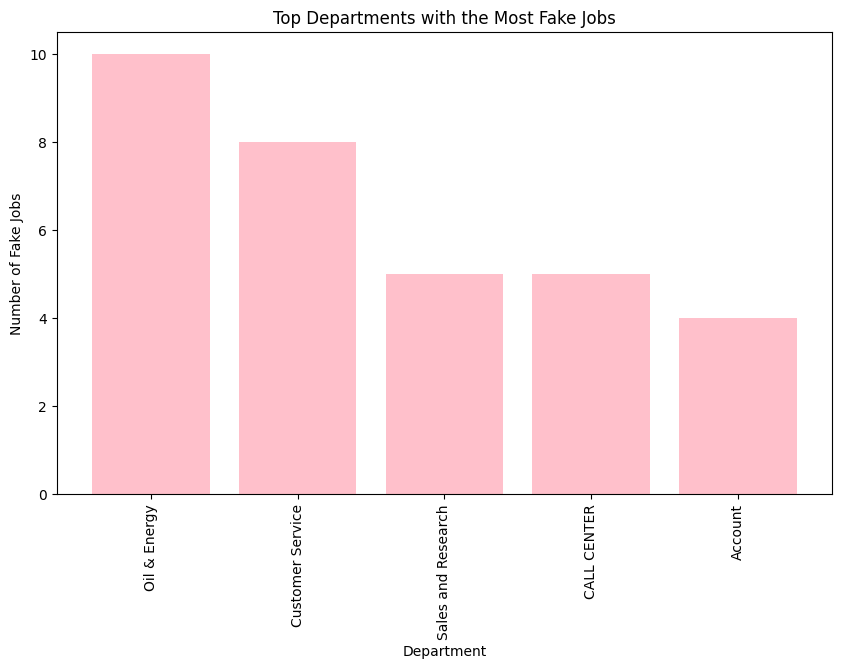

In [ ]:
top_departments = department_counts.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_departments.index, top_departments.values,color='pink')
plt.xlabel('Department')
plt.ylabel('Number of Fake Jobs')
plt.title('Top Departments with the Most Fake Jobs')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#This line selects columns from the DataFrame df that have data types 'object' (typically string data) or 'category' (categorical data).
cat_features = data.select_dtypes(include=['object','category'])

In [ ]:
cat_features

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management
15,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",Full-time,Executive,Bachelor's Degree,Facilities Services,Sales
23,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,Full-time,Executive,Unspecified,Internet,Sales
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other
102,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,Full-time,Entry level,Bachelor's Degree,Internet,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",Full-time,Entry level,High School or equivalent,Real Estate,Customer Service
17759,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",Full-time,Entry level,High School or equivalent,Real Estate,Customer Service
17813,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",Full-time,Entry level,High School or equivalent,Real Estate,Customer Service
17849,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design


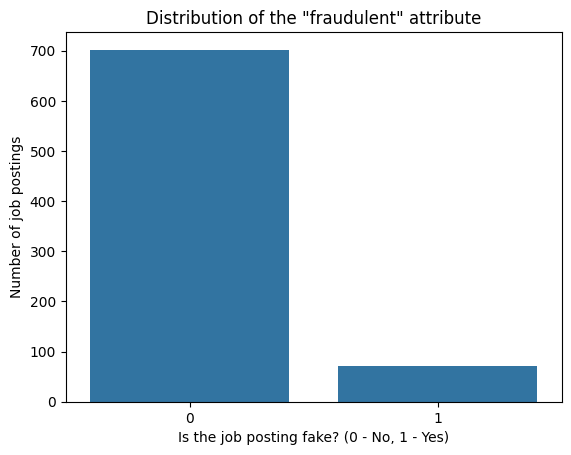

In [ ]:
sb.countplot(x='fraudulent',data=data)
plt.title('Distribution of the "fraudulent" attribute')
plt.xlabel('Is the job posting fake? (0 - No, 1 - Yes)')
plt.ylabel('Number of job postings')
plt.show()
#Clearly the data is imbalanced

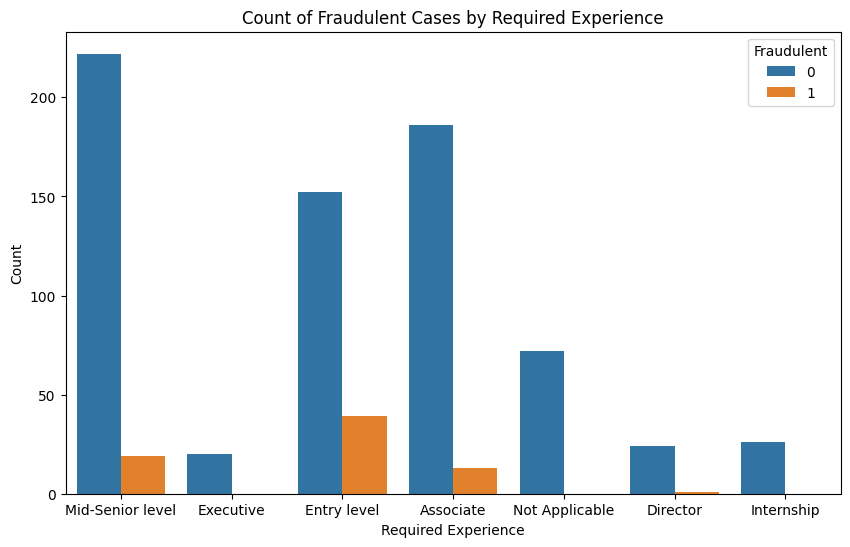

In [ ]:
plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='required_experience', hue='fraudulent')
plt.title('Count of Fraudulent Cases by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()
#there isn't any so we can remove this


The chat above Checks if there is any relationship between the target class and required experience

# **DATA TRANSFORMATION**

In [ ]:
data['fraudulent'].value_counts()

fraudulent
0    702
1     72
Name: count, dtype: int64

In [ ]:
'''This line imports the LabelEncoder class from the sklearn.preprocessing module.
LabelEncoder is used to convert categorical labels into numerical values.

'''
from sklearn.preprocessing import LabelEncoder

In [ ]:
'''This line initializes an instance of the LabelEncoder class,
which will be used to transform categorical labels into numerical values.

'''

le = LabelEncoder()

In [ ]:
cat_features

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management
15,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",Full-time,Executive,Bachelor's Degree,Facilities Services,Sales
23,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,Full-time,Executive,Unspecified,Internet,Sales
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other
102,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,Full-time,Entry level,Bachelor's Degree,Internet,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",Full-time,Entry level,High School or equivalent,Real Estate,Customer Service
17759,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",Full-time,Entry level,High School or equivalent,Real Estate,Customer Service
17813,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",Full-time,Entry level,High School or equivalent,Real Estate,Customer Service
17849,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design


In the code below
The first line starts a loop that iterates over each column in the DataFrame cat_features which contains only categorical columns.
Inside the loop, it applies label encoding to each categorical column.
The fit_transform() method of the LabelEncoder class fits the encoder to the unique values of the column and then transforms the labels into numerical values.

The transformed numerical values are assigned back to the corresponding column in the DataFrame df, replacing the original categorical values with numerical representations.

In [ ]:
for column in cat_features.columns:
    data[column] = le.fit_transform(data[column])

In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,255,10,12,83,67,677,613,510,0,1,1,1,5,4,50,20,0
15,16,596,91,193,23,89,24,316,94,0,1,1,1,3,1,24,31,0
23,24,599,110,37,9,165,2,304,119,0,1,0,1,3,7,38,31,0
98,99,269,100,155,294,196,250,414,82,0,1,1,1,5,3,49,23,1
102,103,346,43,147,43,125,532,183,232,1,1,0,1,2,1,38,22,0


In [ ]:
data['department'].value_counts()

department
193    99
87     58
142    44
157    32
66     26
       ..
58      1
81      1
185     1
101     1
219     1
Name: count, Length: 243, dtype: int64

# **FEATURE SELECTION**

In [ ]:
X = data[['fraudulent']]
y = data['salary_range']

In [ ]:
'''This block of code splits your dataset into training and testing sets using train_test_split() from scikit-learn.
X is the feature data, and y is the target variable.
test_size=0.3 specifies that 30% of the data will be used for testing, and 70% will be used for training.
random_state=0 ensures reproducibility by fixing the random seed.

'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#This line imports the LinearRegression class from scikit-learn.
from sklearn.linear_model import LinearRegression

#This line creates an instance of the LinearRegression model and fits it to the training data (X_train and y_train) using the fit() method.
#The model learns the coefficients (weights) for the linear regression equation that best fits the training data.

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [ ]:
#This line retrieves the coefficients (slopes) of the linear regression model.

model.coef_

array([5.07333715])

In [ ]:
#This line retrieves the intercept of the linear regression model.

model.intercept_

152.8076152304609

In [ ]:
#evaluating the performance of your linear regression model using various regression metrics
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 6556.73355885665
RMSE: 80.97365966076036
R2: -0.0016886222637386705


# **MULTILINEAR REGRESSION**

In [ ]:
X = data[['salary_range','title','requirements']]
y = data['fraudulent']

In [ ]:
X

,salary_range,title,requirements
6,83,255,613
15,23,596,316
23,9,599,304
98,294,269,414
102,43,346,183
...,...,...,...
17734,139,138,288
17759,139,138,288
17813,139,138,288
17849,274,100,479


In [ ]:
y

6        0
15       0
23       0
98       1
102      0
        ..
17734    1
17759    1
17813    1
17849    0
17865    0
Name: fraudulent, Length: 774, dtype: int64

In [ ]:
## Split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [ ]:
model.intercept_

0.0917359984703636

In [ ]:
model.coef_

array([ 5.65617313e-05, -7.70178390e-05,  5.01678300e-06])

In [ ]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", round(r2,2))

MSE: 0.11383612081480486
RMSE: 0.33739608891450545
R2: -0.01


In [ ]:
r2_score(y_train, model.predict(X_train))

0.0029786647212640682

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
dt_model = DecisionTreeRegressor().fit(X, y)
print (dt_model, "\n")

# Visualize the model tree
tree = export_text(dt_model)
print(tree)

DecisionTreeRegressor() 

|--- feature_2 <= 263.50
|   |--- feature_1 <= 4.50
|   |   |--- value: [1.00]
|   |--- feature_1 >  4.50
|   |   |--- feature_2 <= 24.50
|   |   |   |--- feature_2 <= 23.50
|   |   |   |   |--- feature_1 <= 570.00
|   |   |   |   |   |--- feature_1 <= 147.50
|   |   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_1 >  147.50
|   |   |   |   |   |   |--- feature_2 <= 16.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_2 >  16.50
|   |   |   |   |   |   |   |--- feature_2 <= 18.00
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_2 >  18.00
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_1 >  570.00
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_2 >  23.50
|   |   |   |   

In [ ]:
# Evaluate the model using the test data
predictions = dt_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.0
RMSE: 0.0
R2: 1.0


In [ ]:
r2_score_training = r2_score(y_train,model.predict(X_train))
r2_score_training

0.0029786647212640682

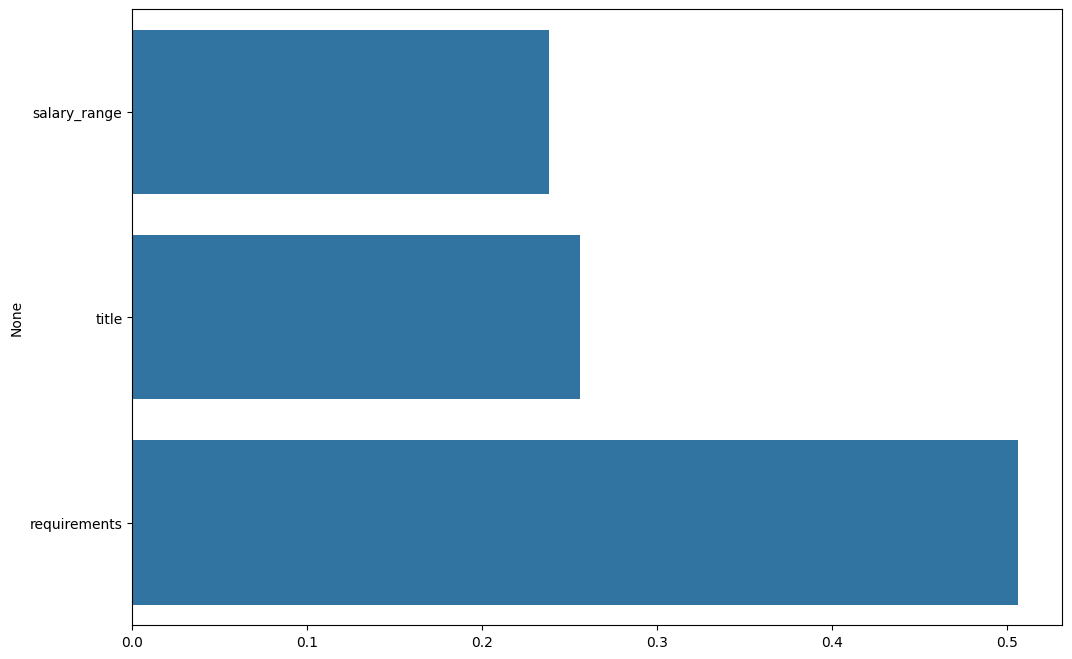

In [ ]:
#feature importance

plt.figure(figsize=(12,8))

importance = dt_model.feature_importances_

sb.barplot(x=importance, y=X.columns)
plt.show()

# **CONCLUSION**

Based on Analysis and data exploration of this dataset,we have 68 industries that carry out Job posting,the job posting with the most fraudulent jobs are the Oil and energy,Followed by customer Service,Sales and research,call center and Account.
  Therefore it is important to Note that in a bid to get jobs that pay in foreign currency one have to take immense caution to avoid been a victim.
